In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [6]:
X = np.linspace(0, np.pi * 2)
phi = np.pi / 4
Y = np.sin(X + phi)

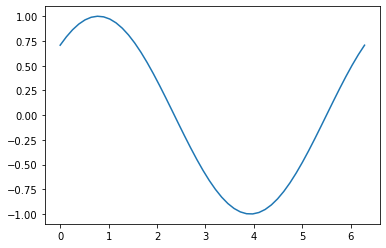

In [7]:
plt.plot(X, Y)

In [13]:
fig, ax = plt.subplots(figsize=(7,3))

line, = ax.plot([])

ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.1, 1.1)

anim = FuncAnimation(
  fig,
  lambda frame: line.set_data((X, np.sin(X + 2 * np.pi * frame / 100))),
  frames=100,
  interval=50
)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [19]:
def animate(x, fx, xlim=None, ylim=None, frames=100, interval=20, max_t=1):
  fig, ax = plt.subplots(figsize=(7,3))

  line, = ax.plot([])

  if xlim is not None:
    ax.set_xlim(xlim)
  if ylim is not None:
    ax.set_ylim(ylim)

  anim = FuncAnimation(
    fig,
    lambda frame: line.set_data((x, fx(max_t * frame / frames))),
    frames=frames,
    interval=interval
  )

  video = anim.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

In [20]:
animate(
  X,
  lambda t: np.sin(X + t),
  xlim=(0, 2 * np.pi),
  ylim=(-1.1, 1.1),
  max_t=2 * np.pi,
)

In [62]:
L = 1
k = 1
N = 100
x = np.linspace(0, L, 300)
x = x.reshape(1, -1)
n = np.arange(1, N, 2)
n = n.reshape(-1, 1)

def heat(t):
  return np.sum(4 / (n * np.pi) * np.exp(-k * (n * np.pi / L)**2 * t) * np.sin(n * np.pi * x / L), axis=0)

In [63]:
heat(0).shape

(300,)

In [39]:
animate(
  x,
  heat,
  xlim=(0, L),
  ylim=(0, 1.1),
  max_t=0.2,
)

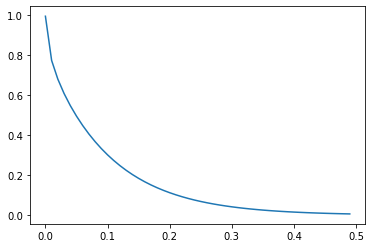

In [65]:
t = np.arange(0, 0.5, 0.01)
avg = np.zeros_like(t)
for i, ti in enumerate(t):
  avg[i] = np.trapz(heat(ti), dx=np.diff(x)[0]) / L
  
plt.plot(t, avg)

In [51]:
n = np.arange(1, N)
n = n.reshape(-1, 1)

a0 = 1

def heat(t):
  return a0 / 2 + np.sum(2 / (n * np.pi) * np.sin(n * np.pi / 2) * np.exp(-k * (n * np.pi / L)**2 * t) * np.cos(n * np.pi / L * x), axis=0)

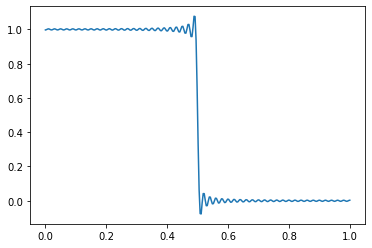

In [52]:
plt.plot(x.flatten(), heat(0))

In [58]:
animate(
  x,
  heat,
  xlim=(0, L),
  max_t=0.5,
  frames=200
)

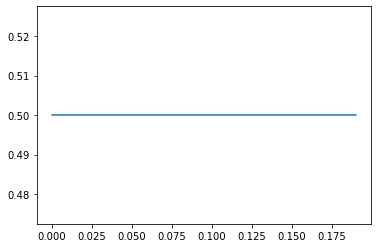

In [60]:
t = np.arange(0, 0.2, 0.01)
avg = np.zeros_like(t)
for i, ti in enumerate(t):
  avg[i] = np.trapz(heat(ti), dx=np.diff(x)[0]) / L
  
plt.plot(t, avg)

In [92]:
Delta = 0.1
L = 1
c = 1
N = 150

x = np.linspace(0, L, 150)
x = x.reshape(1, -1)

n = np.arange(1, N)
n = n.reshape(-1, 1)

def u(t):
  return np.sum(2 / (c * n * np.pi) * np.sin(n * np.pi * Delta) * np.sin(n * np.pi / L * x) * np.sin(c * n * np.pi / L * t), axis=0)

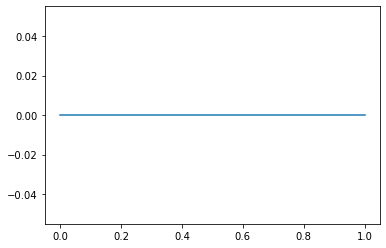

In [93]:
plt.plot(x.flatten(), u(0))

In [94]:
animate(
  x,
  u,
  max_t=2,
  ylim=(-0.6, 0.6),
  frames=500,
)

In [95]:
def u(t):
  return np.sum(2 / (c * n * np.pi) * np.cos(n * np.pi * Delta) * np.sin(c * n * np.pi / L * t) * np.cos(n * np.pi / L * x), axis=0)

In [96]:
Delta = 0

animate(
  x,
  u,
  max_t=2,
  ylim=(-1.1, 1.1),
  frames=400,
)